In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from datetime import datetime
plt.style.use('dark_background')

In [2]:
df = pd.read_csv(r"../data/raw/train.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df.set_index('Order Date',inplace=True)
df.sort_index(inplace=True)
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2015-01-03,7981,CA-2015-103800,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,742,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,741,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,740,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,1760,CA-2015-141817,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [3]:
df['Sub-Category'].unique()

array(['Paper', 'Binders', 'Storage', 'Labels', 'Art', 'Phones', 'Chairs',
       'Fasteners', 'Furnishings', 'Accessories', 'Envelopes',
       'Bookcases', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Finding highest selling and lowest selling category

In [112]:
category = df.groupby('Category')['Sales'].sum()
cat = pd.DataFrame({'Total Sales': category, 'Count': df['Category'].value_counts()})
cat

,Total Sales,Count
Category,,
Furniture,728658.5757,2078
Office Supplies,705422.3340,5909
Technology,827455.8730,1813


In [113]:
df_tech = df[df["Category"]=='Technology'].copy()
tech_cat = df_tech.groupby('Sub-Category')['Sales'].sum()
tech_count = df_tech['Sub-Category'].value_counts()
cat = pd.DataFrame({'Total Sales': tech_cat, 'Count': tech_count,'Price':tech_cat/tech_count})
cat

,Total Sales,Count,Price
Sub-Category,,,
Accessories,164186.700,756,217.178175
Copiers,146248.094,66,2215.880212
Machines,189238.631,115,1645.553313
Phones,327782.448,876,374.180877


In [114]:
df_office = df[df["Category"]=='Office Supplies'].copy()
office_cat = df_office.groupby('Sub-Category')['Sales'].sum()
office_count = df_office['Sub-Category'].value_counts()
cat = pd.DataFrame({'Total Sales': office_cat, 'Count': office_count,'Price':office_cat/office_count})
cat

,Total Sales,Count,Price
Sub-Category,,,
Appliances,104618.403,459,227.926804
Art,26705.410,785,34.019631
Binders,200028.785,1492,134.067550
Envelopes,16128.046,248,65.032444
Fasteners,3001.960,214,14.027850
Labels,12347.726,357,34.587468
Paper,76828.304,1338,57.420257
Storage,219343.392,832,263.633885
Supplies,46420.308,184,252.284283


In [115]:
df_furn = df[df["Category"]=='Furniture'].copy()
furn_cat = df_furn.groupby('Sub-Category')['Sales'].sum()
furn_count = df_furn['Sub-Category'].value_counts()
cat = pd.DataFrame({'Total Sales': furn_cat, 'Count': furn_count,'Price':furn_cat/furn_count})
cat

,Total Sales,Count,Price
Sub-Category,,,
Bookcases,113813.1987,226,503.598224
Chairs,322822.7310,607,531.833165
Furnishings,89212.0180,931,95.823865
Tables,202810.6280,314,645.893720


Here, we see, most sales are in office supplies, while technology sales are low but prices of products are high</br>
in tech, copiers are most expensive and ofc underperforming, while in office supplies, most selling is paper and binders.</br>
Highest revenue contribution is Technology, mostly from phones, and 2nd highest nis chairs from furniture</br>

<Axes: xlabel='Order Date'>

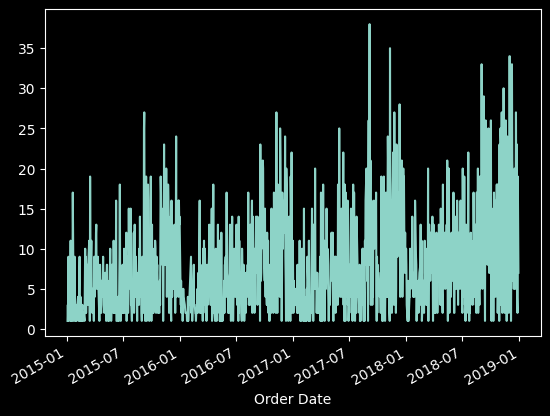

In [116]:
df.groupby(level=0).size().plot()

Sales is increasing with time

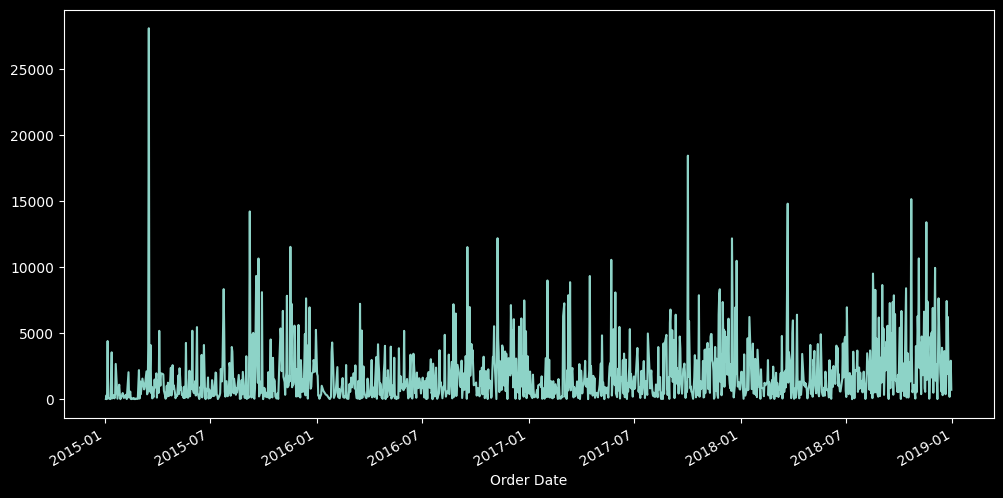

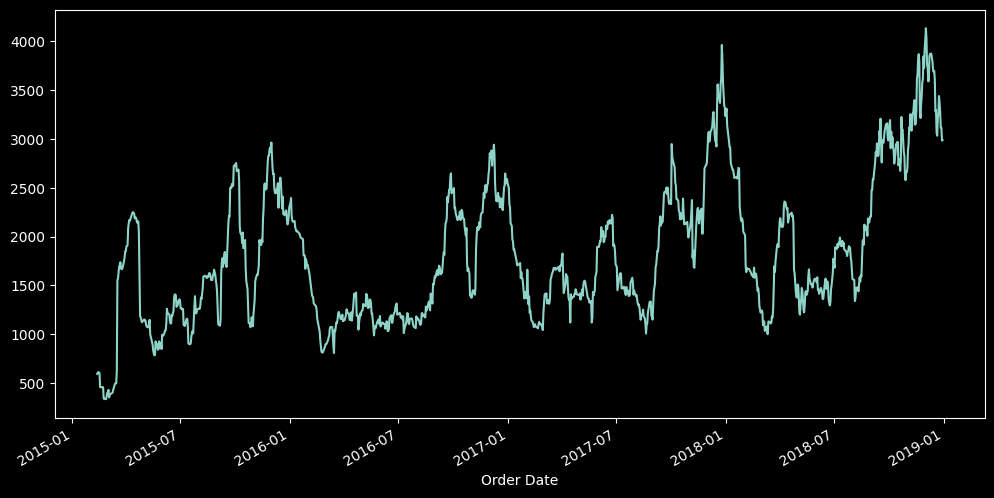

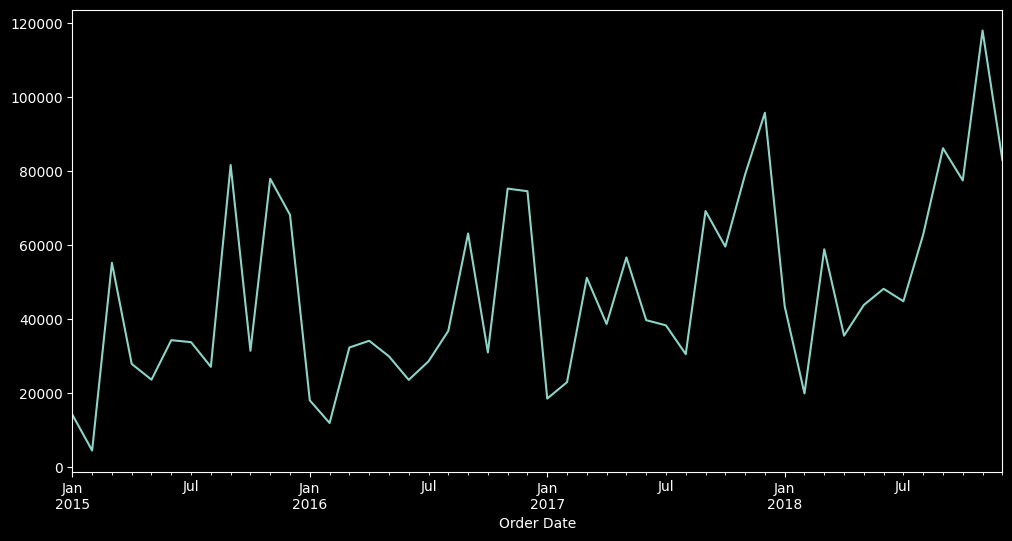

<Axes: xlabel='Order Date'>

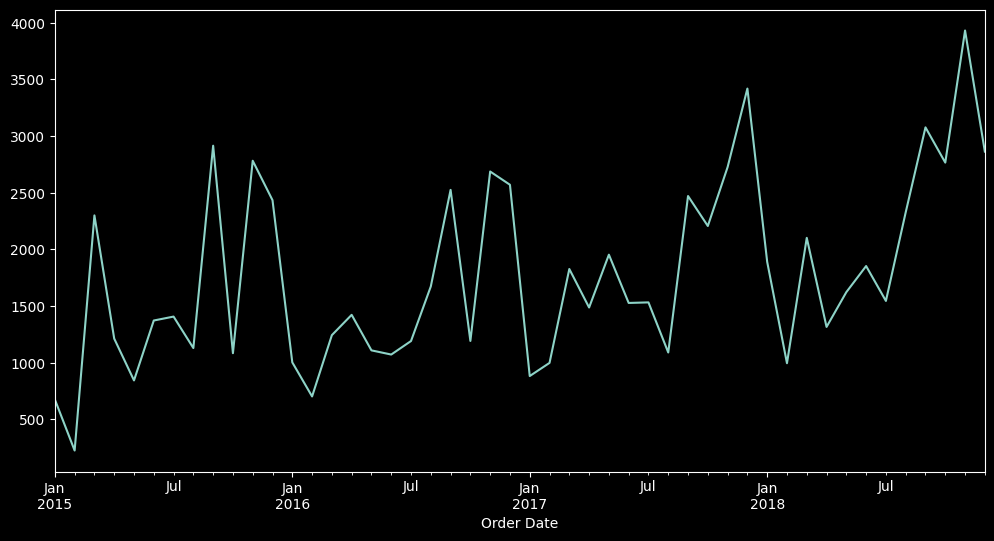

In [117]:
Sale = pd.DataFrame({'sales':df.groupby(level=0)['Sales'].sum()})
plt.show()
Sale['30_day_avg'] = Sale['sales'].rolling(window=30).mean()
Sale['sales'].plot( figsize=(12,6))
plt.show()
Sale['30_day_avg'].plot( figsize=(12,6))
plt.show()
Sale.resample('ME')['sales'].sum().plot(figsize=(12,6))
plt.show()
Sale.resample('ME')['sales'].mean().plot(figsize=(12,6))

Text(0, 0.5, 'Average Sales')

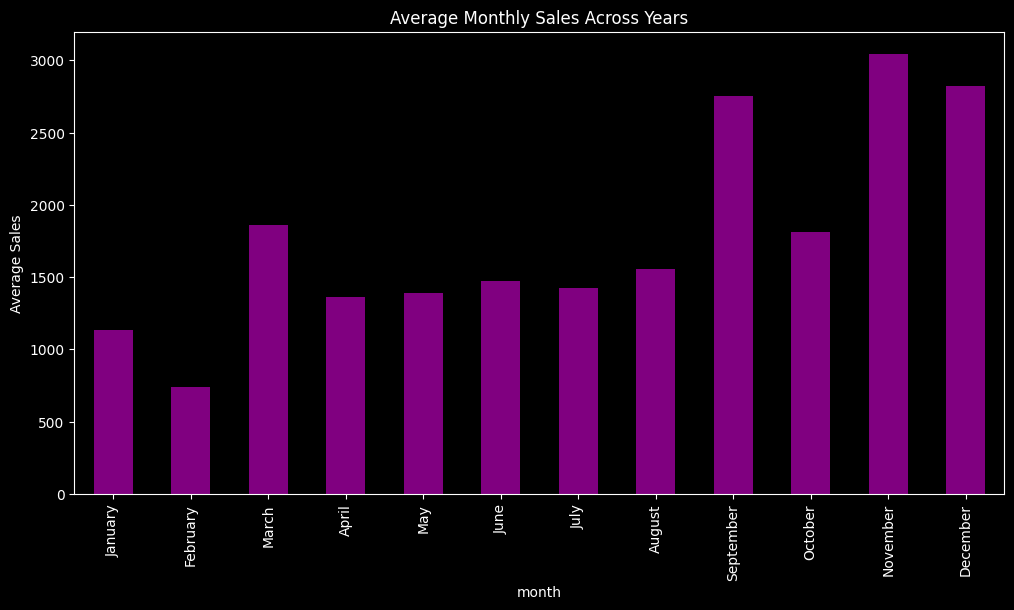

In [118]:
Sale['month'] = Sale.index.month_name()
monthly_avg = Sale.groupby('month')['sales'].mean()
monthly_avg = monthly_avg.reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='purple', title='Average Monthly Sales Across Years')
plt.ylabel('Average Sales')

march, september, nov-dec have sales peak

<Axes: ylabel='Region'>

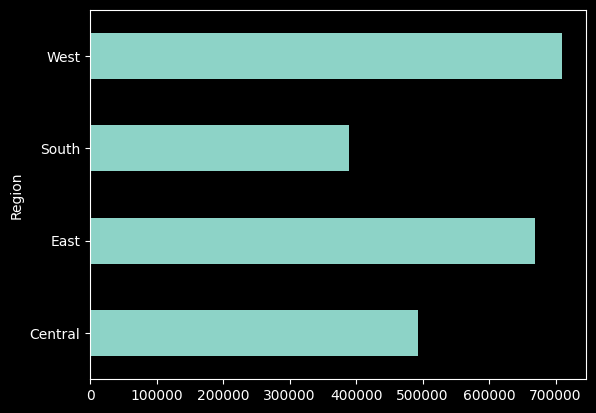

In [119]:
df.groupby(['Region'])['Sales'].sum().plot(kind='barh')

<Axes: ylabel='Segment'>

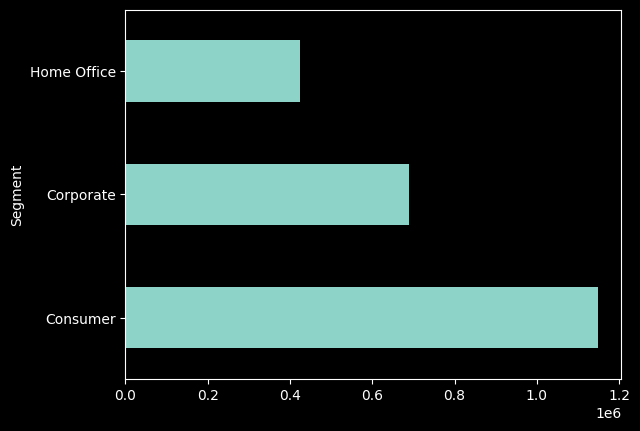

In [120]:
df.groupby(['Segment'])['Sales'].sum().plot(kind='barh')

<Axes: ylabel='Region'>

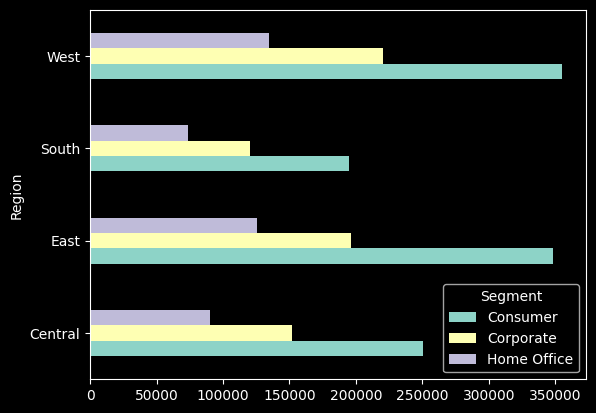

In [121]:
df.groupby(['Region','Segment'])['Sales'].sum().unstack(1).plot(kind='barh')

consumers in east and west are main revenue contributors

<Axes: ylabel='Segment'>

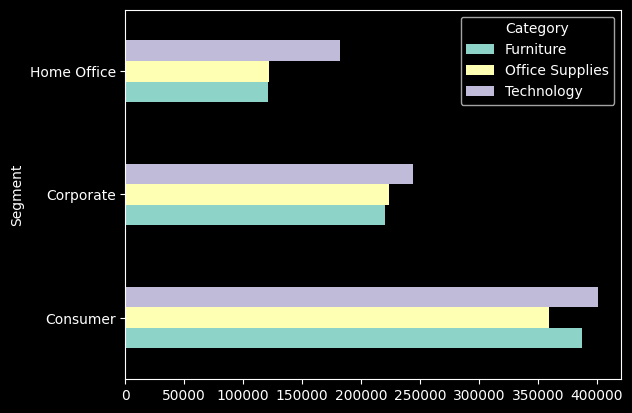

In [122]:
df.groupby(['Category','Segment'])['Sales'].sum().unstack(0).plot(kind='barh')

<Axes: ylabel='Region'>

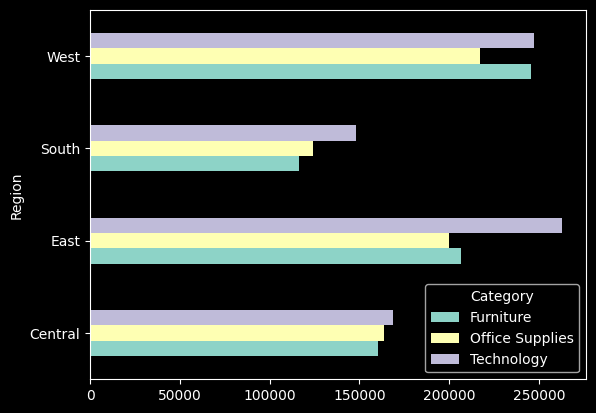

In [123]:
df.groupby(['Category','Region'])['Sales'].sum().unstack(0).plot(kind='barh')

office supplies are purchased by all 3 segments, while technology generates max revenue in all 3 segments

<Axes: ylabel='Segment'>

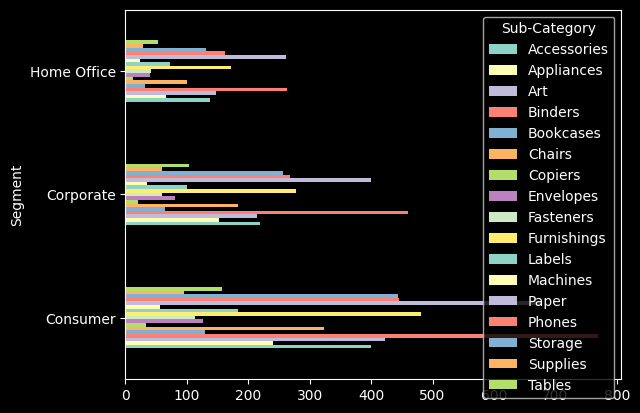

In [124]:
df.groupby(['Sub-Category','Segment']).size().unstack(0).plot(kind='barh')

<Axes: ylabel='State'>

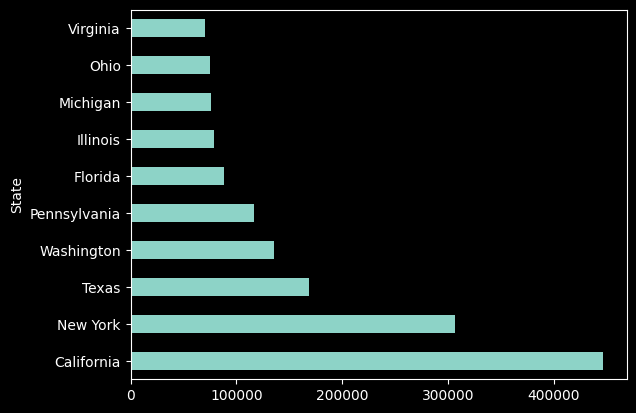

In [125]:
df.groupby(['State'])['Sales'].sum().nlargest(10).plot(kind='barh')

<Axes: ylabel='City'>

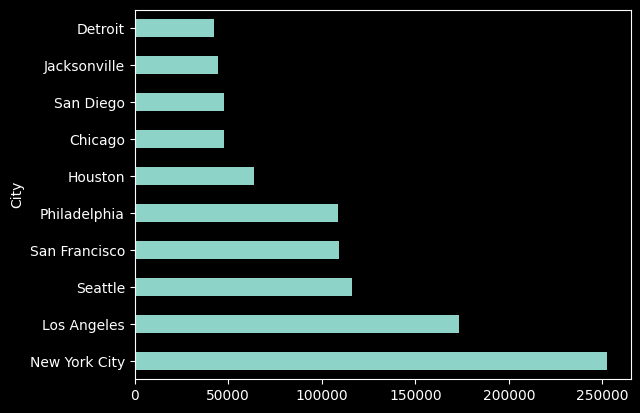

In [126]:
df.groupby(['City'])['Sales'].sum().nlargest(10).plot(kind='barh')

<Axes: ylabel='City'>

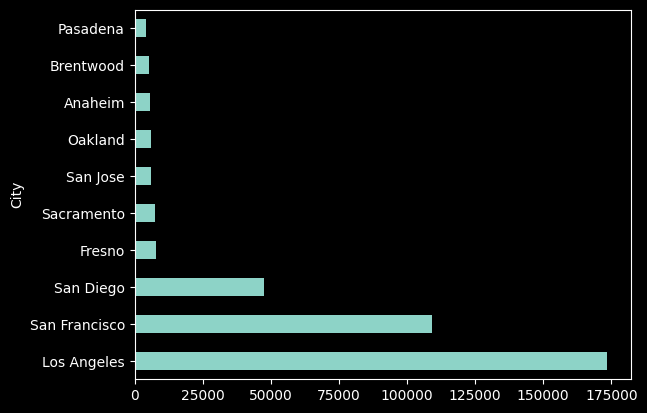

In [127]:
df[df['State']=='California'].groupby('City')['Sales'].sum().nlargest(10).plot(kind='barh')

new york city has highest sales, while new york state is 2nd high in sales before California, and in california, los angeles and ssn frascisco city has highest sales

In [128]:
df['State'].value_counts().nlargest(8)

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Illinois         483
Ohio             454
Florida          373
Name: count, dtype: int64

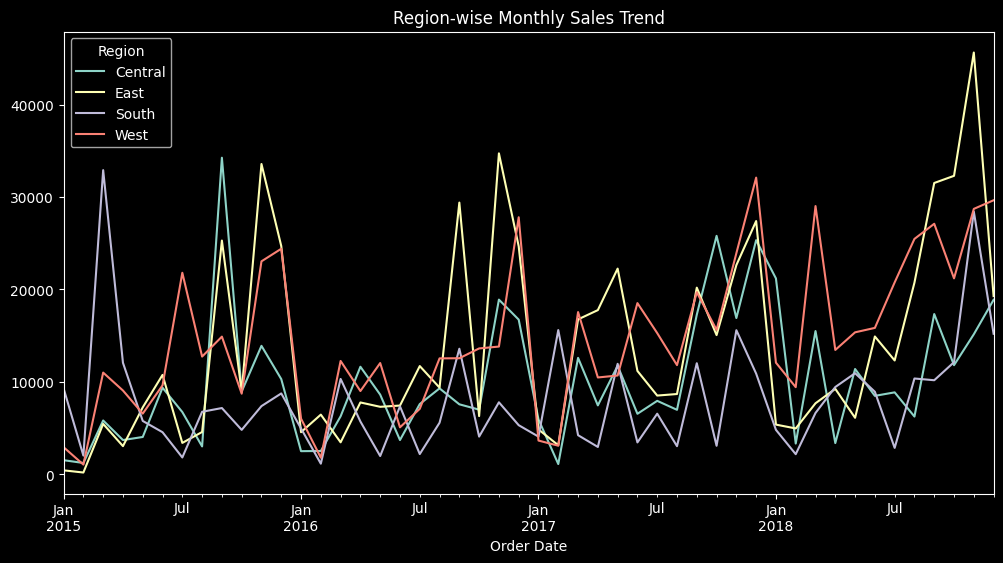

<Axes: title={'center': 'Category-wise Monthly Sales Trend'}, xlabel='Order Date'>

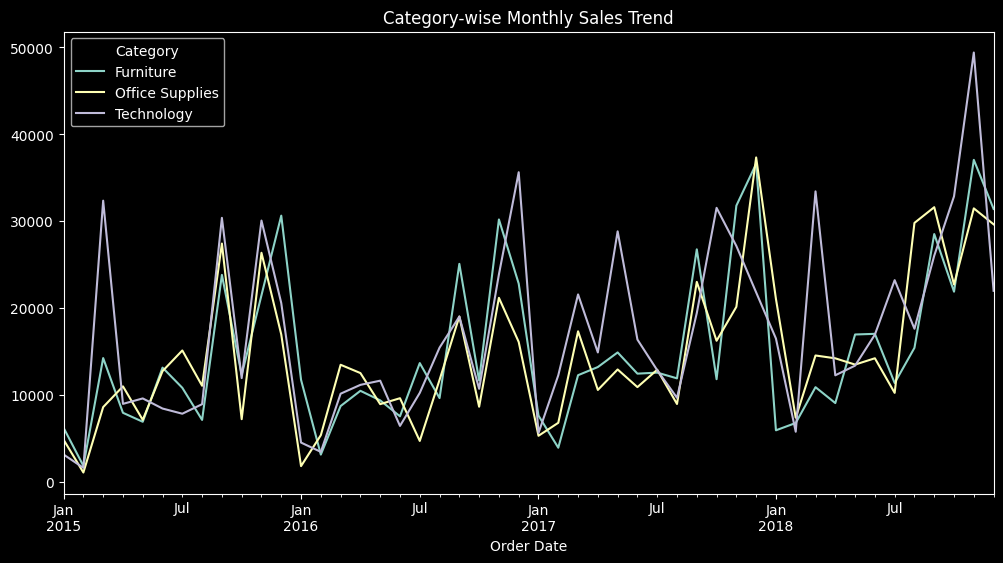

In [129]:
df_region = df.groupby(['Region']).resample('ME')['Sales'].sum().unstack(0)
df_region.plot(figsize=(12,6), title='Region-wise Monthly Sales Trend')
plt.show()
df_category = df.groupby(['Category']).resample('ME')['Sales'].sum().unstack(0)
df_category.plot(figsize=(12,6), title='Category-wise Monthly Sales Trend')

<Axes: title={'center': 'Top 5 Sub-Categories Sales Trend'}, xlabel='Order Date'>

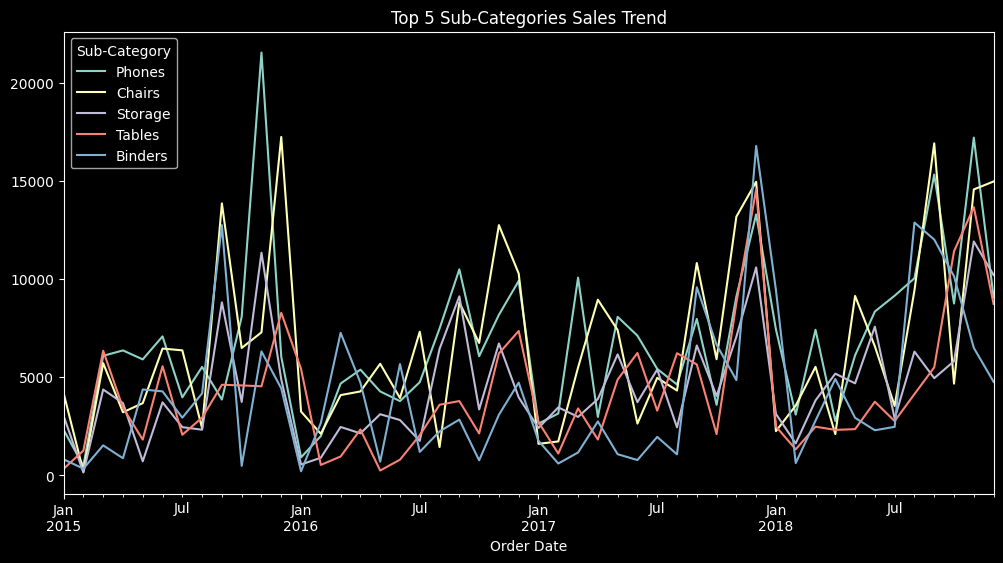

In [130]:
df_subcategory = df.groupby(['Sub-Category']).resample('ME')['Sales'].sum().unstack(0)
top_subcategories = df.groupby('Sub-Category')['Sales'].sum().nlargest(5).index
df_subcategory[top_subcategories].plot(figsize=(12,6), title='Top 5 Sub-Categories Sales Trend')


<Axes: title={'center': 'Top 5 Sub-Categories Sell Trend'}, xlabel='Order Date'>

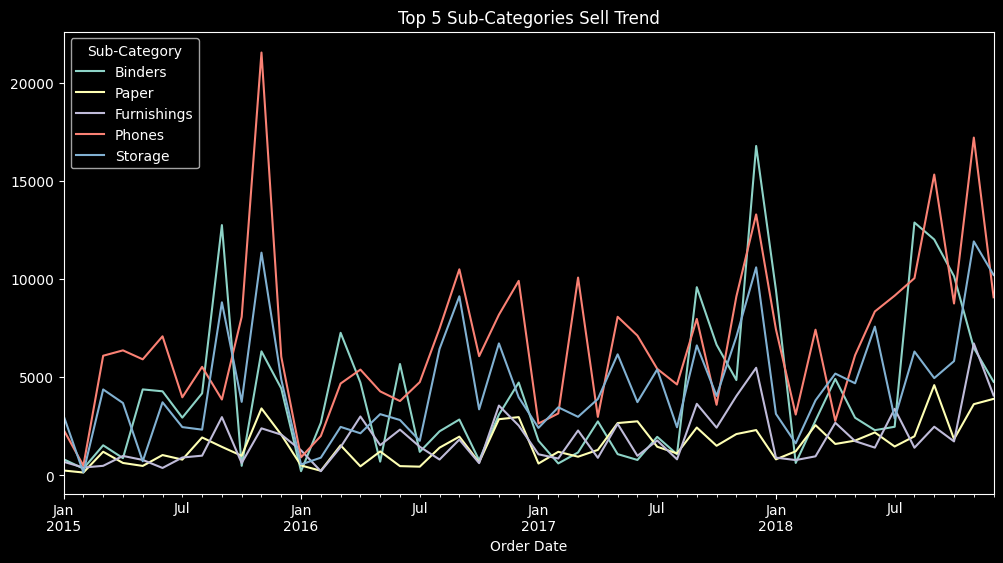

In [131]:
topsell_subcategories = df['Sub-Category'].value_counts()[:5].index
#print(df['Sub-Category'])
df_subcategory[topsell_subcategories].plot(figsize=(12,6), title='Top 5 Sub-Categories Sell Trend')

<Axes: title={'center': 'Category-wise Monthly Sales Trend'}, xlabel='Order Date'>

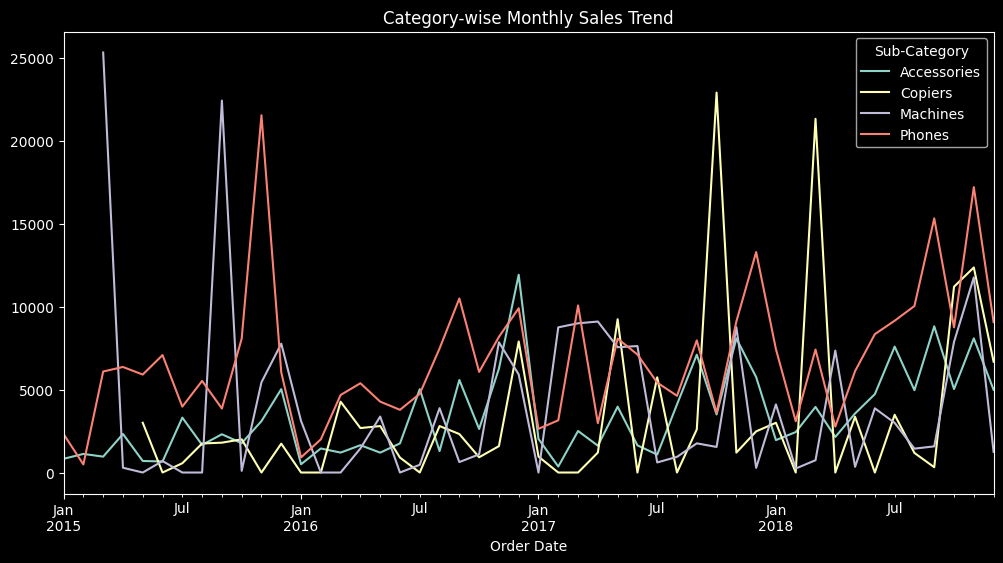

In [132]:
df_tech = df[df['Category']=='Technology'].groupby(['Sub-Category']).resample('ME')['Sales'].sum().unstack(0)
df_tech.plot(figsize=(12,6), title='Category-wise Monthly Sales Trend')

<Axes: title={'center': 'Category-wise Monthly Sales Trend'}, xlabel='Order Date'>

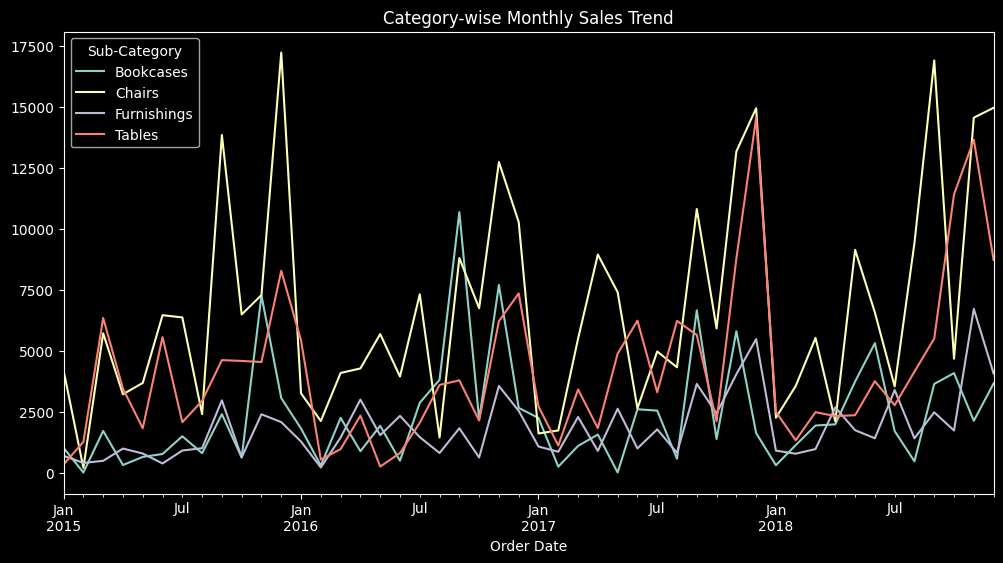

In [133]:
df_tech = df[df['Category']=='Furniture'].groupby(['Sub-Category']).resample('ME')['Sales'].sum().unstack(0)
df_tech.plot(figsize=(12,6), title='Category-wise Monthly Sales Trend')

Paper and appliances seem to have increasing demand

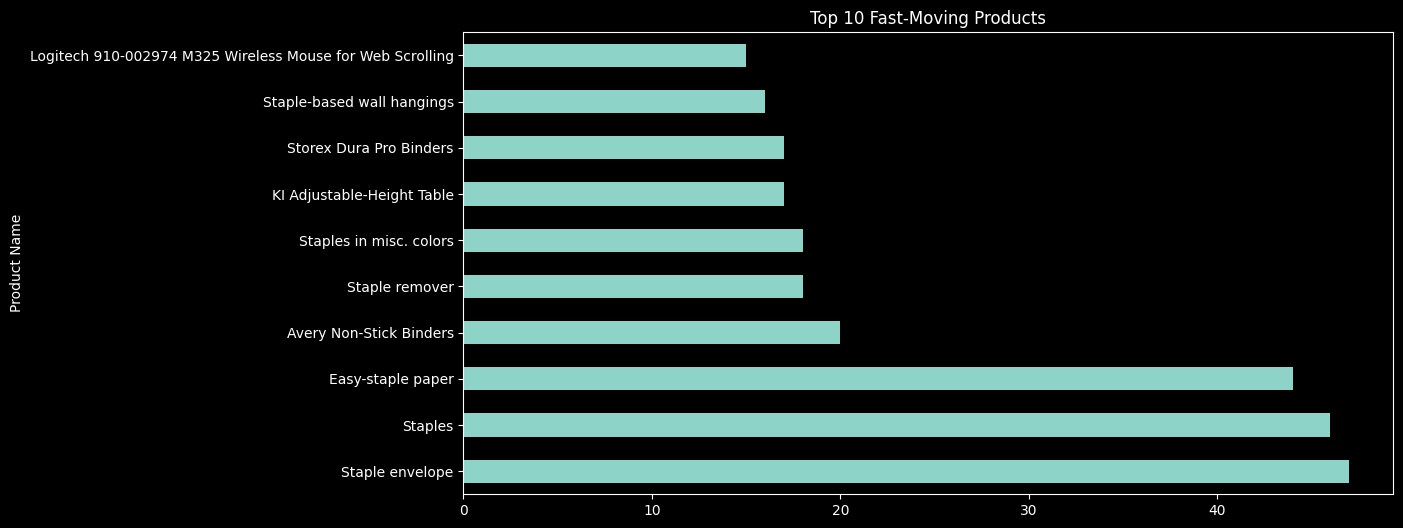

<Axes: title={'center': 'Top 10 Slow-Moving Products'}, ylabel='Product Name'>

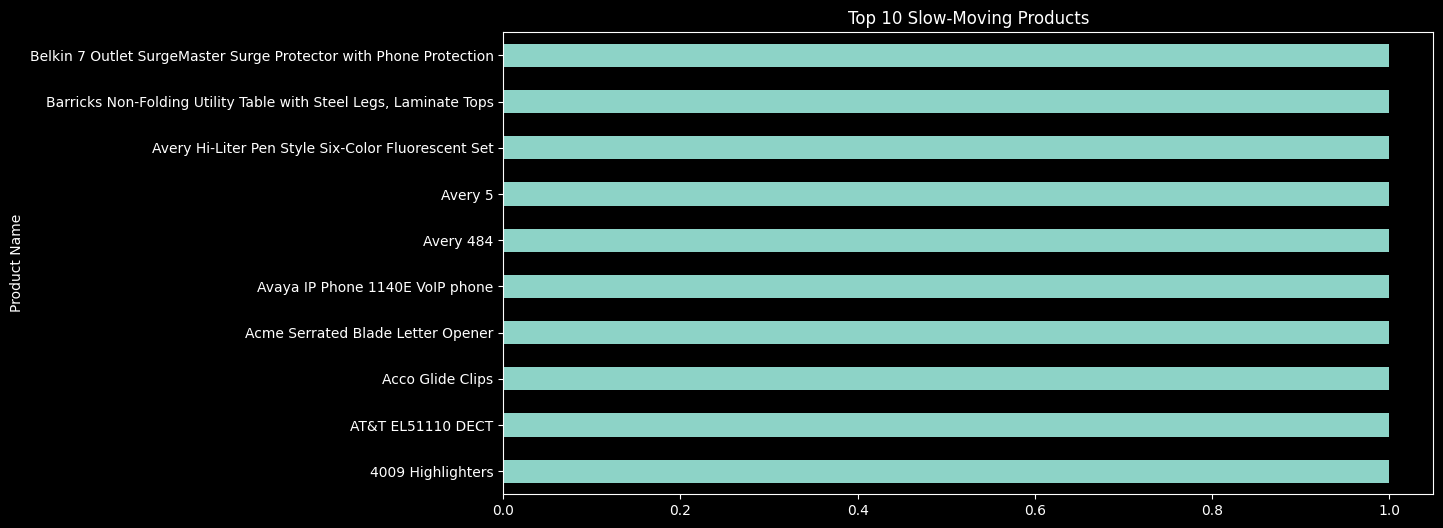

In [134]:
df_fast_moving = df.groupby('Product Name').size().nlargest(10)
df_fast_moving.plot(kind='barh', figsize=(12,6), title="Top 10 Fast-Moving Products")
plt.show()
df_slow_moving = df.groupby('Product Name')['Order ID'].count().nsmallest(10)
df_slow_moving.plot(kind='barh', figsize=(12,6), title="Top 10 Slow-Moving Products")

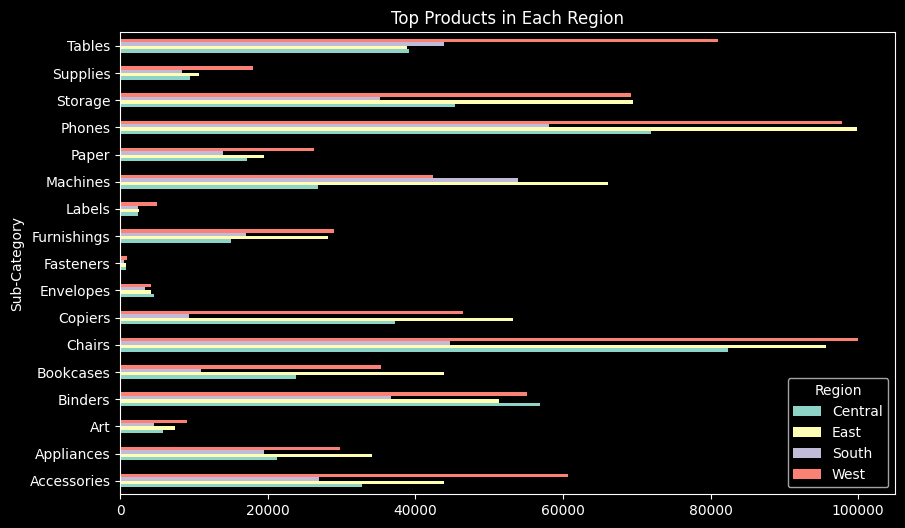

In [135]:
df.groupby(['Region', 'Sub-Category'])['Sales'].sum().unstack(0).plot(kind='barh',figsize=(10,6), title="Top Products in Each Region")
plt.show()

Only binders are most sold in central area, rest are sold most in east/west regions.

<Axes: title={'center': 'Top 5 Most Popular Products Over Time'}, xlabel='Order Month'>

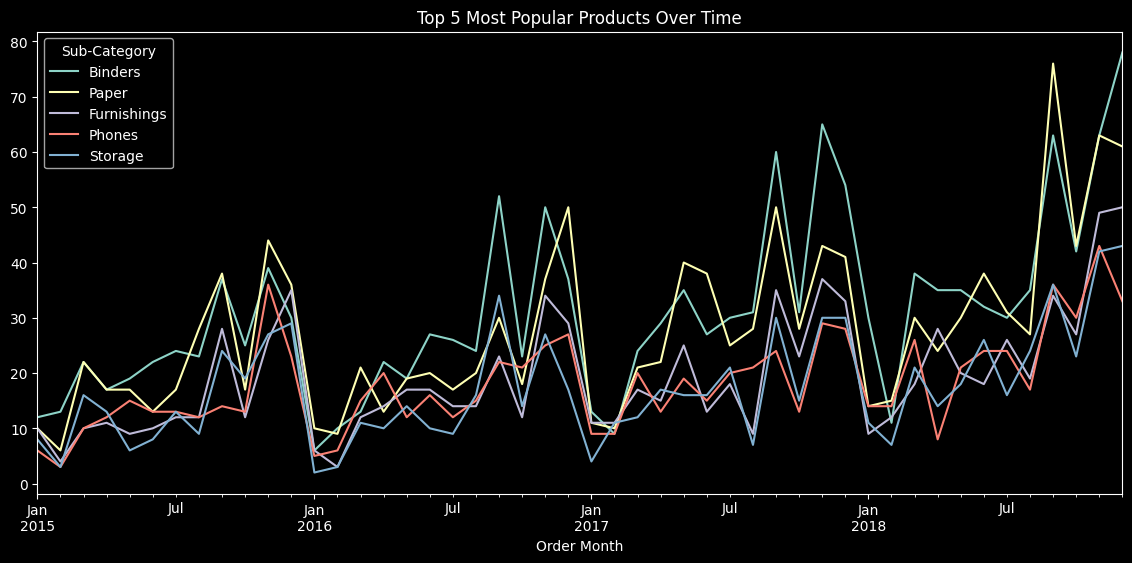

In [136]:
df['Order Month'] = df.index.to_period('M')
df_popular_trend = df.groupby(['Order Month', 'Sub-Category']).size().unstack().fillna(0)
top_5_subcategories = df['Sub-Category'].value_counts().nlargest(5).index
df_popular_trend[top_5_subcategories].plot(figsize=(14,6), title="Top 5 Most Popular Products Over Time")
                                                                                               

In [137]:
df['Order Year'] = df.index.to_period('Y')
first_purchase = df.groupby('Customer ID')['Order Year'].min().reset_index()
first_purchase.rename(columns={'Order Year':'First Purchase Year'}, inplace=True)

In [138]:
df['Order Year'].value_counts()

Order Year
2018    3258
2017    2534
2016    2055
2015    1953
Freq: Y-DEC, Name: count, dtype: int64

In [139]:
df2 = df.reset_index().copy()
df2 = df2.merge(first_purchase, on='Customer ID', how='left')
df2.set_index(keys='Order Date')
df2[df2['First Purchase Year']==df2['Order Year']].groupby('Order Year').size()

Order Year
2015    1953
2016     478
2017     207
2018      46
Freq: Y-DEC, dtype: int64

In [140]:
df2[df2['First Purchase Year']==df2['Order Year']].groupby('Order Year')['Customer ID'].nunique()

Order Year
2015    589
2016    141
2017     52
2018     11
Freq: Y-DEC, Name: Customer ID, dtype: int64

In [141]:
new_customers_df = df2[df2['First Purchase Year'] == df2['Order Year']]
new_customer_counts = new_customers_df.groupby('Order Year')['Customer ID'].nunique()
repeat_orders = df2[df2['Customer ID'].isin(new_customers_df['Customer ID'])]
repeat_order_counts = repeat_orders.groupby('First Purchase Year').size()
repeat_behavior = pd.DataFrame({
    'New Customers': new_customer_counts,
    'Total Orders by New Customers': repeat_order_counts
})
repeat_behavior['Orders per New Customer'] = (
    repeat_behavior['Total Orders by New Customers'] / repeat_behavior['New Customers']
)

In [142]:
repeat_behavior

,New Customers,Total Orders by New Customers,Orders per New Customer
2015,589,7787,13.220713
2016,141,1507,10.687943
2017,52,460,8.846154
2018,11,46,4.181818


In [143]:
df2['Year Offset'] = df2['Order Year'].astype(int) - df2['First Purchase Year'].astype(int)
df_cohorts = df2[df2['First Purchase Year'].notna()]
cohort_counts = df_cohorts.groupby(['First Purchase Year', 'Year Offset'])['Customer ID'].nunique().unstack(fill_value=0)
cohort_counts = cohort_counts.sort_index()
print(cohort_counts)

Year Offset            0    1    2    3
First Purchase Year                    
2015                 589  426  476  510
2016                 141  107  124    0
2017                  52   45    0    0
2018                  11    0    0    0


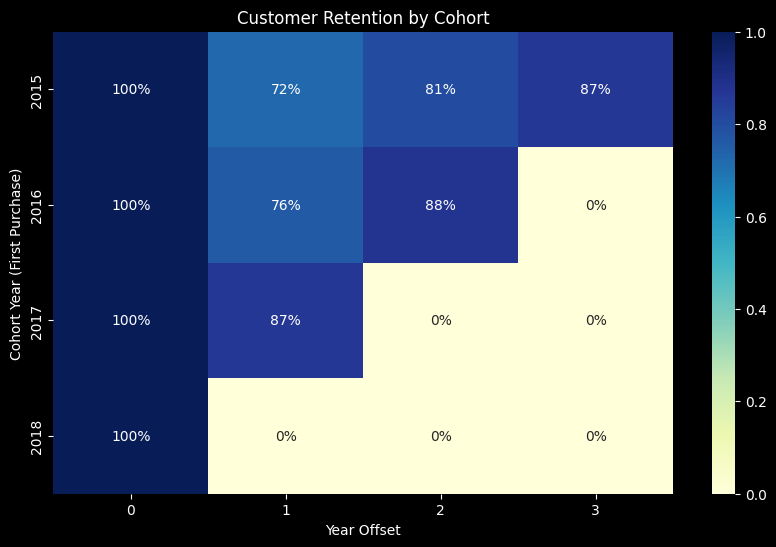

In [144]:
retention = cohort_counts.divide(cohort_counts[0], axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Customer Retention by Cohort")
plt.ylabel("Cohort Year (First Purchase)")
plt.xlabel("Year Offset")
plt.show()


<Axes: xlabel='Order Year'>

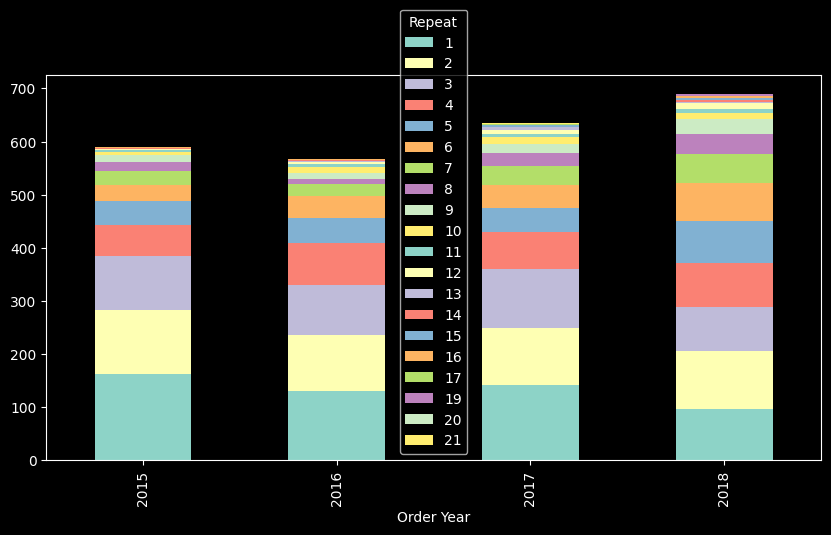

In [145]:
df['Repeat'] = df.groupby(['Order Year','Customer ID'])['Customer ID'].transform('count')
df.groupby(['Order Year','Repeat'])['Customer ID'].nunique().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

new customers are joining less as time passing</br>
as year passing, more people are buying, and there are more repeat purchases indicating good retention</br>
newer ppl in later years tend purchase more frequently than others </br>

In [146]:
last_purchase = df.groupby('Customer ID')['Order Month'].max().reset_index()
last_purchase.rename(columns={'Order Month':'Last Purchase'}, inplace=True)
df2 = df2.merge(last_purchase, on='Customer ID', how='left')

In [147]:
df2.set_index(keys='Order Date',inplace=True)

In [148]:
ref_date = pd.to_datetime('2019-1')
df2['Time passed'] = (ref_date.year - df2['Last Purchase'].dt.year) * 12 + (ref_date.month - df2['Last Purchase'].dt.month)

In [149]:
df2['No of purchases'] = df2.groupby('Customer ID')['Order ID'].transform('count')

In [150]:
bins = [0, 3, 6, 12, df2['Time passed'].max()]
labels = ['Active (0-3 months)', 'At Risk (3-6 months)', 'Churning (6-12 months)', 'Lost (>12 months)']
df2['Customer Segment'] = pd.cut(df2['Time passed'], bins=bins, labels=labels)

In [151]:
df2['Customer Segment'].value_counts(normalize=True)*100

Customer Segment
Active (0-3 months)       59.816327
At Risk (3-6 months)      19.979592
Churning (6-12 months)    11.387755
Lost (>12 months)          8.816327
Name: proportion, dtype: float64

8% of customers have been lost

In [152]:
df.groupby('Customer Name')['City'].nunique().nlargest(5)

Customer Name
Emily Phan             15
Joel Eaton             13
Anna Häberlin          12
Chloris Kastensmidt    11
Clay Ludtke            11
Name: City, dtype: int64

In [153]:
df2[df2['Customer Segment']=='Lost (>12 months)'].groupby('Sub-Category')['Customer ID'].nunique()

Sub-Category
Accessories    43
Appliances     43
Art            56
Binders        72
Bookcases      19
Chairs         39
Copiers         6
Envelopes      14
Fasteners      18
Furnishings    51
Labels         23
Machines        9
Paper          61
Phones         48
Storage        54
Supplies       15
Tables         20
Name: Customer ID, dtype: int64

In [154]:
df2[df2['Customer Segment']=='Lost (>12 months)'].groupby('Segment')['Customer ID'].nunique()/df2.groupby('Segment')['Customer ID'].nunique()

Segment
Consumer       0.119804
Corporate      0.139831
Home Office    0.141892
Name: Customer ID, dtype: float64

around 14% from home office and 13% from corporte are lost

In [155]:
df2['Sub-Category'].value_counts()/df2.groupby('Sub-Category')['Customer ID'].nunique()

Sub-Category
Accessories    1.615385
Appliances     1.296610
Art            1.602041
Binders        2.306028
Bookcases      1.164948
Chairs         1.498765
Copiers        1.064516
Envelopes      1.233831
Fasteners      1.138298
Furnishings    1.783525
Labels         1.284173
Machines       1.161616
Paper          2.226290
Phones         1.721022
Storage        1.634578
Supplies       1.179487
Tables         1.212355
dtype: float64

most repeat purchases are in paper, phones, furnishings and less repeat purchases are in copiers, bookcases, machines, supplies, tables

In [156]:
df_customer = df.groupby('Customer ID')['Sub-Category'].agg(list).reset_index()
df_customer=df_customer.set_index(keys='Customer ID')
df_customer['No of Purchases']= df2.groupby('Customer ID').size()
df_customer = df_customer.merge(df2[['Customer Name', 'Segment','Customer Segment','Time passed','First Purchase Year','Last Purchase']].drop_duplicates(), 
                                on=df_customer.index, 
                                how='left')


In [157]:
df_customer=df_customer.rename(columns={'key_0':'Customer ID'})
df_customer=df_customer.set_index(keys='Customer ID')

In [158]:
df_customer[df_customer['Customer Segment']=='Lost (>12 months)'].sort_values(by='Time passed',ascending=False).head(5)

,Sub-Category,No of Purchases,Customer Name,Segment,Customer Segment,Time passed,First Purchase Year,Last Purchase
Customer ID,,,,,,,,
KD-16345,"[Paper, Art, Paper, Phones, Binders, Accessori...",10,Nicole Brennan,Corporate,Lost (>12 months),39,2015,2015-10
MJ-17740,"[Accessories, Binders, Binders, Storage, Paper...",15,Georgia Rosenberg,Corporate,Lost (>12 months),38,2015,2015-11
PA-19060,"[Binders, Art, Envelopes, Accessories, Binders...",7,Ricardo Emerson,Consumer,Lost (>12 months),37,2015,2015-12
BD-11560,"[Accessories, Paper, Paper, Paper]",4,Craig Molinari,Corporate,Lost (>12 months),34,2015,2016-03
DS-13030,"[Art, Bookcases, Paper, Binders, Storage, Bind...",19,Valerie Takahito,Home Office,Lost (>12 months),33,2015,2016-04


<Axes: xlabel='Customer ID'>

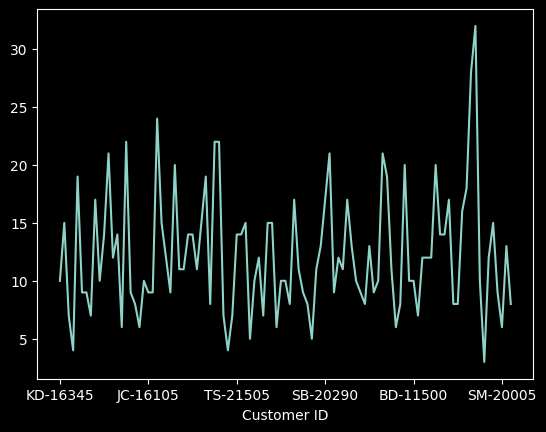

In [159]:
df_customer[df_customer['Customer Segment']=='Lost (>12 months)'].sort_values(by='Time passed',ascending=False)['No of Purchases'].plot()

<Axes: xlabel='No of Purchases', ylabel='Time passed'>

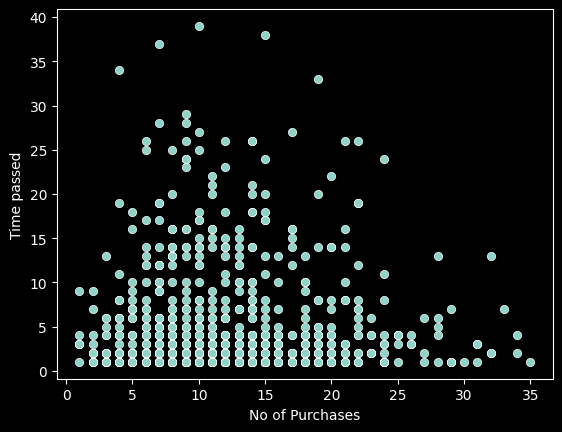

In [160]:
sns.scatterplot(x=df_customer['No of Purchases'],y=df_customer['Time passed'])

5-20 purchases customers have churned

<Axes: title={'center': 'Customer Segment Distribution by Segment'}, xlabel='Segment'>

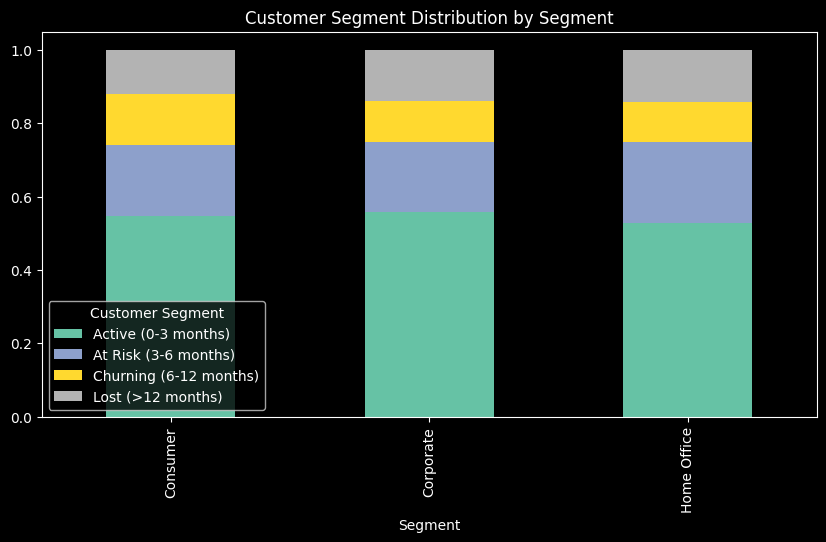

In [161]:
churn_counts = df_customer.groupby('Segment')['Customer Segment'].value_counts(normalize=True).unstack().fillna(0)
churn_counts.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2', title='Customer Segment Distribution by Segment')

<Axes: title={'center': 'Churned Customers Over Time'}, xlabel='Last Purchase'>

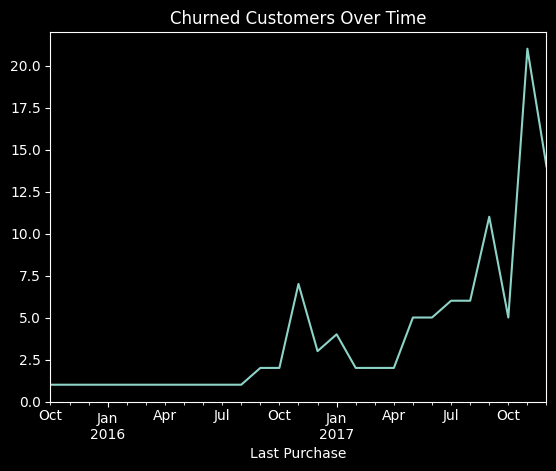

In [162]:
churn_trend = df_customer[df_customer['Customer Segment']=='Lost (>12 months)'].groupby('Last Purchase').size()
churn_trend.plot(title='Churned Customers Over Time')


sales forecast, basket analysis, optimization, recommendation, customer segmentation

Sales Forecast

In [163]:
sales_df = df.groupby(level=0)['Sales'].sum().resample('ME').sum().reset_index()

In [164]:
sales_df.set_index(keys='Order Date',inplace=True)

In [165]:
from statsmodels.tsa.stattools import adfuller
r = adfuller(sales_df['Sales'])
r[1]<0.05

np.True_

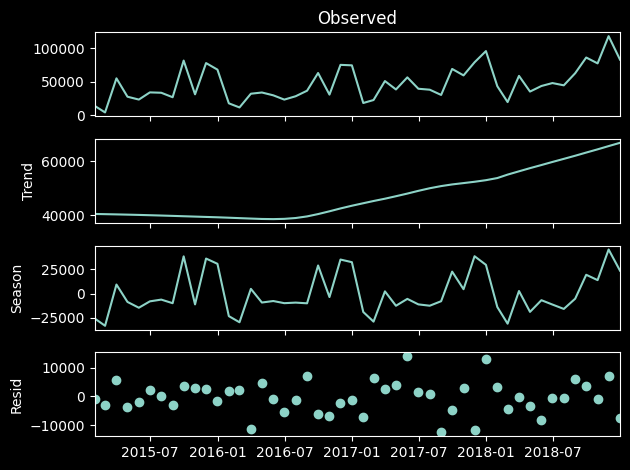

In [166]:
from statsmodels.tsa.seasonal import STL
stl = STL(sales_df)
r = stl.fit()
r.plot()
plt.show()
sales_df['Trend']=r.trend
sales_df['Seasonal']=r.seasonal
sales_df['Resid']=r.resid

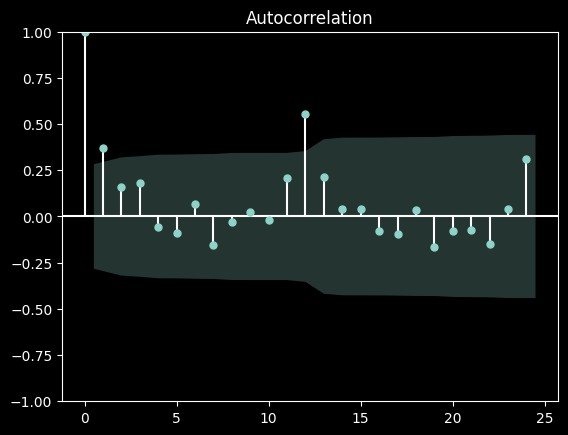

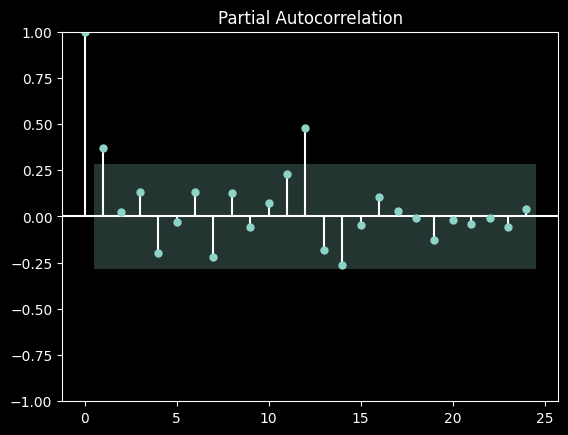

In [167]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(sales_df['Sales'],lags=24)
pacf = plot_pacf(sales_df['Sales'],lags=24)

0.4923969624451008


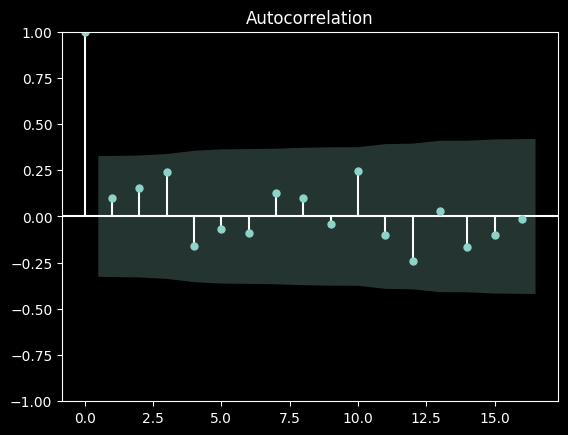

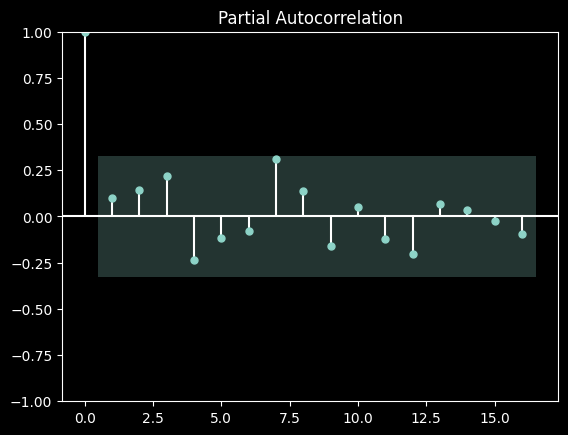

In [168]:
sales_df['Sales_S1'] = sales_df['Sales'].diff(12)
print(adfuller(sales_df['Sales_S1'].dropna())[1])
acf = plot_acf(sales_df['Sales_S1'].dropna())
pacf = plot_pacf(sales_df['Sales_S1'].dropna())

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


R2 score:  0.3930932041673799
100-MAPE score:  99.68927102021517
RMSE score:  15839.837907982122


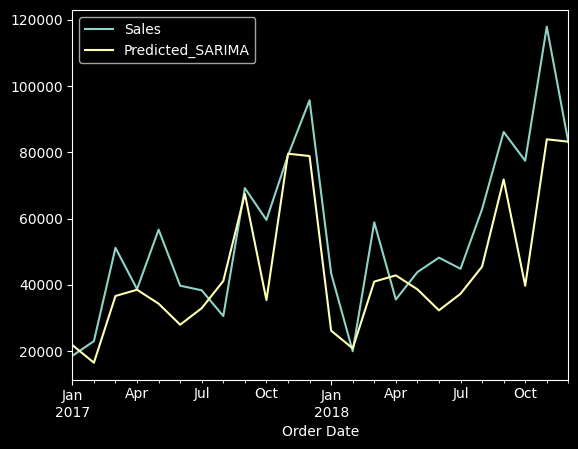

In [169]:
from datetime import timedelta
train_df = sales_df[:datetime(2016,12,31)].copy()
test_df = sales_df[datetime(2016,12,31)+timedelta(days=1):].copy()
pred_start = test_df.index[0]
pred_end = test_df.index[-1]
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_df['Sales'],order=(2,1,1),seasonal_order=(0,1,0,12),freq='ME')
model_SARIMA_fit=model_SARIMA.fit()
#model_SARIMA_fit.summary()
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2017,1,1),end=datetime(2018,12,31))
test_df['Predicted_SARIMA']=pred_Sarima
test_df[['Sales','Predicted_SARIMA']].plot()
from sklearn.metrics import r2_score, mean_absolute_percentage_error, root_mean_squared_error
print("R2 score: ",r2_score(test_df.dropna()['Predicted_SARIMA'],test_df.dropna()['Sales']))
print("100-MAPE score: ",100-mean_absolute_percentage_error(test_df.dropna()['Predicted_SARIMA'],test_df.dropna()['Sales']))
print("RMSE score: ",root_mean_squared_error(test_df.dropna()['Predicted_SARIMA'],test_df.dropna()['Sales']))

In [170]:
future_sales = sales_df.copy()
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_df['Sales'],order=(2,1,1),seasonal_order=(0,1,0,12),freq='ME')
model_SARIMA_fit=model_SARIMA.fit()
#model_SARIMA_fit.summary()
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2017,1,1),end=datetime(2019,12,31))
future_dates = pd.date_range(start=datetime(2017,1,1),end=datetime(2019,12,31),freq='ME')
future = pd.DataFrame({'Sales':[None]*len(future_dates),'Pred':pred_Sarima,},index=future_dates)
future_sales = pd.concat([future_sales, future])


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\AppData\Local\Temp\ipykernel_15716\2754482929.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_sales = pd.concat([future_sales, future])


<Axes: >

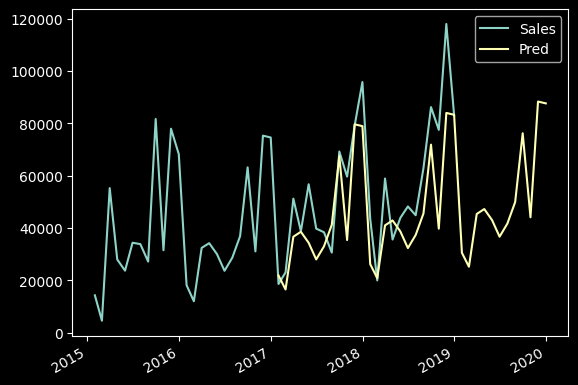

In [171]:
future_sales[['Sales', 'Pred']].plot()

We can see the sales forecast here

In [172]:
from statsmodels.tsa.stattools import adfuller
sales_df['Trend_2'] = sales_df['Trend'].diff(1).diff(1)
r = adfuller(sales_df['Trend_2'].dropna())
r[1]<0.05

np.True_

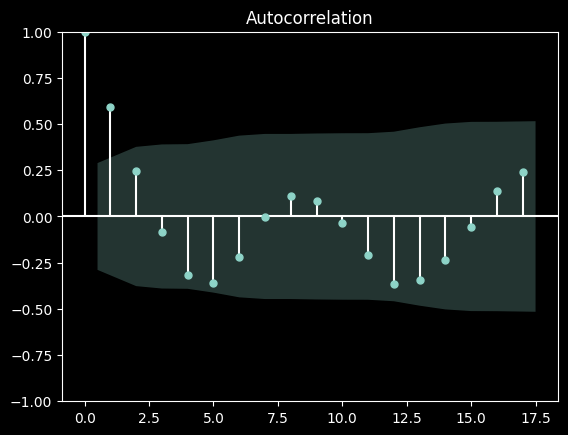

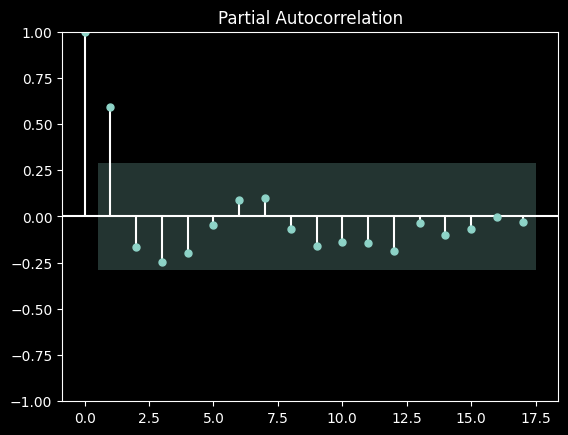

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(sales_df['Trend_2'].dropna())
pacf = plot_pacf(sales_df['Trend_2'].dropna())

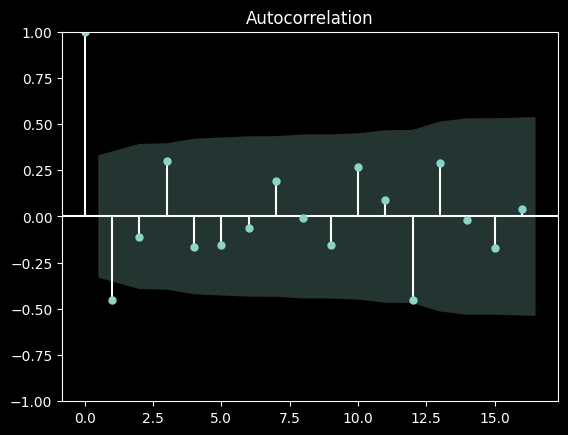

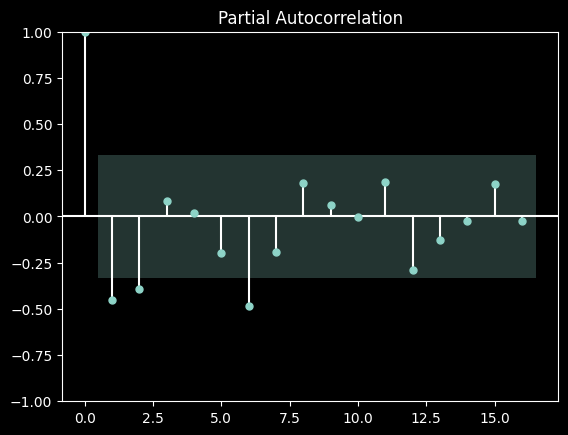

In [174]:
acf = plot_acf(sales_df['Resid'].diff(12).diff(1).dropna())
pacf = plot_pacf(sales_df['Resid'].diff(12).diff(1).dropna())

R2 score:  0.9181997169201035
100-MAPE score:  99.8702038648587
RMSE score:  7127.293937181823


<Axes: xlabel='Order Date'>

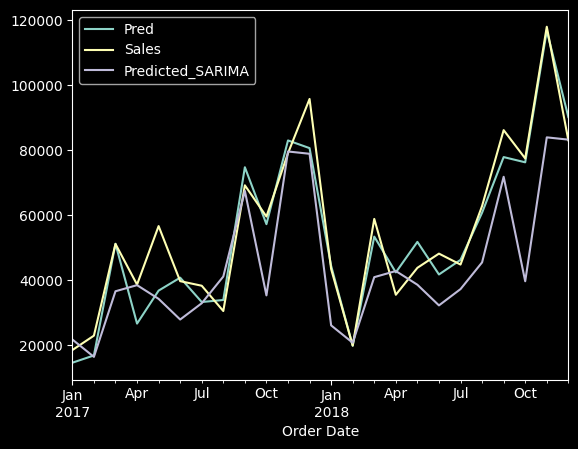

In [175]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_df['Resid'].dropna(),order=(4,0,4),freq='ME').fit()
test_df['Pred_res'] = model.forecast(steps=24)
from numpy.polynomial.polynomial import Polynomial
x = np.arange(len(train_df))
p = Polynomial.fit(x,train_df['Trend'],deg=2)
pred = p(np.arange(len(train_df),len(sales_df)))
test_df['pred_tr']=pred
test_df['Pred'] = test_df['pred_tr']+test_df['Seasonal']+test_df['Pred_res']
print("R2 score: ",r2_score(test_df.dropna()['Pred'],test_df.dropna()['Sales']))
print("100-MAPE score: ",100-mean_absolute_percentage_error(test_df.dropna()['Pred'],test_df.dropna()['Sales']))
print("RMSE score: ",root_mean_squared_error(test_df.dropna()['Pred'],test_df.dropna()['Sales']))
test_df[['Pred','Sales','Predicted_SARIMA']].plot()

In [176]:
future_sales2 = sales_df.copy()
model = ARIMA(train_df['Resid'].dropna(),order=(4,0,4),freq='ME').fit()
pred_res = model.forecast(steps=36)
pred_seas = sales_df['Seasonal'][-12:].values
pred_seas = np.tile(pred_seas,3)
x = np.arange(len(train_df))
p = Polynomial.fit(x,train_df['Trend'],deg=2)
pred_trend = p(np.arange(len(train_df),len(sales_df)+12))
pred = pred_trend+pred_res+pred_seas
future_dates = pd.date_range(start=datetime(2017,1,1),end=datetime(2019,12,31),freq='ME')
future = pd.DataFrame({'Sales':[None]*len(future_dates),'Pred':pred,},index=future_dates)
future_sales2 = pd.concat([future_sales2, future])


Text(0.5, 1.0, 'Forecast using Sarima')

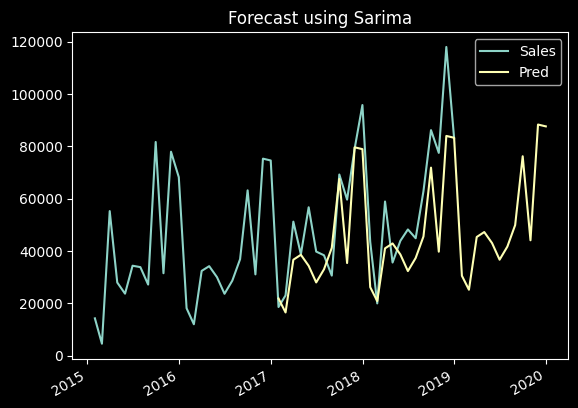

In [177]:
future_sales[['Sales','Pred']].plot()
plt.title('Forecast using Sarima')

Text(0.5, 1.0, 'Forecast using seasonal decompose')

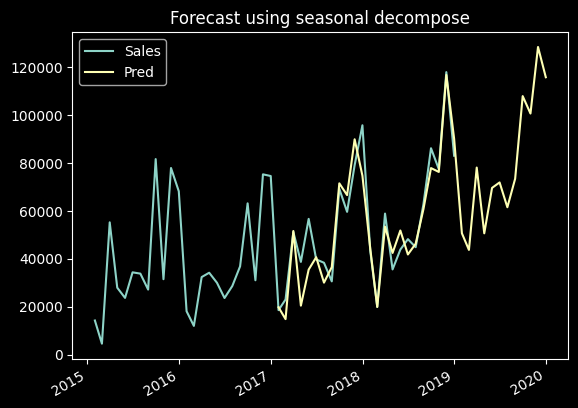

In [178]:
future_sales2[['Sales','Pred']].plot()
plt.title('Forecast using seasonal decompose')

This is our sales forecast, seasonal decompose forecast seems more accurate than Sarima model.

In [179]:
future_sales2['MoM Growth %'] =future_sales2['Pred'].pct_change() * 100
future_sales2['MoM Growth %'][-12:]

2019-01-31   -43.855403
2019-02-28   -13.709233
2019-03-31    78.722276
2019-04-30   -35.169868
2019-05-31    37.472555
2019-06-30     3.278557
2019-07-31   -14.418189
2019-08-31    19.374852
2019-09-30    46.990477
2019-10-31    -6.745757
2019-11-30    27.624190
2019-12-31    -9.845701
Name: MoM Growth %, dtype: float64

Now, Basket analysis and Basket Optimization, to create a recommendation system

In [237]:
items_df=df.groupby([df.index,'Customer Name'])['Sub-Category'].agg(list).reset_index()
items_df = items_df.rename(columns={'Sub-Category':'Items'})
items_df['Count'] = items_df['Items'].apply(lambda x:len(x))
items_df.head(5)

,Order Date,Customer Name,Items,Count
0,2015-01-03,Darren Powers,[Paper],1
1,2015-01-04,Phillina Ober,"[Binders, Storage, Labels]",3
2,2015-01-05,Mick Brown,[Art],1
3,2015-01-06,Jack O'Briant,[Art],1
4,2015-01-06,Lycoris Saunders,[Paper],1


In [181]:
items_df.shape

(4905, 4)

<Axes: xlabel='Count'>

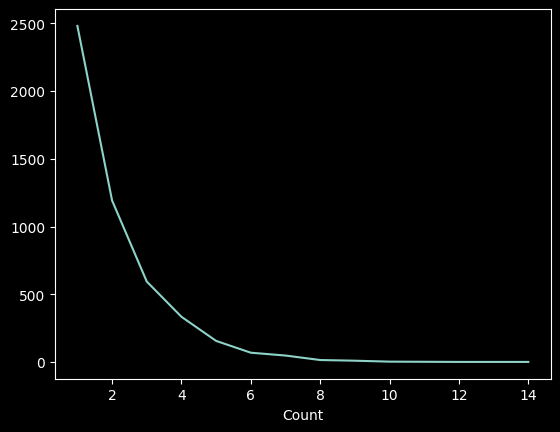

In [238]:
items_df['Count'].value_counts().sort_index(ascending=False).plot()

there are less dense transactions, most transactions are 1-5 items, so apriori is better, since our dataset is small, 4.9k rows

In [239]:
transactions = items_df['Items'].tolist()
print(transactions[:5])

[['Paper'], ['Binders', 'Storage', 'Labels'], ['Art'], ['Art'], ['Paper']]


In [240]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)

support - tells popularity for stocking itemsets</br>
confidence - tells past behaviour, how likely people bought item b when they have bought item a- gives recommendations for new customers</br>
lift - tells how likely two items are related, for placing those items together</br>
leverage - tells rare purchase patterns to get hidden insights</br>
conviction - tells the dependence, like how item b is less likely to be bought alone than with A, high conviction means, people prefer to buy item B when they have bought item A

In [241]:
rules = association_rules(df=frequent_itemsets, metric="conviction", min_threshold=1.5,num_itemsets=len(frequent_itemsets))
rules.sort_values(by='confidence',ascending=False)[['antecedents','consequents','support','confidence','lift','leverage','conviction']].sort_values(by='conviction',ascending=False)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,"(Appliances, Storage)",(Binders),0.006116,0.545455,2.072389,0.003165,1.620958


so binders are 62% less likely to be bought alone than with Appliances and Storage, so if Appliances and Storage sales increases, we have to stock binders more, and as well we can give discounts or offers to promote binder sale, if Appliances and Storage is bought.

In [254]:
frequent_itemsets = apriori(transaction_df, min_support=0.001, use_colnames=True)
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.3,num_itemsets=len(frequent_itemsets))

In [257]:
recommendations = rules[(rules['confidence']>0.6)&(rules['lift']>2)]
recommendations.sort_values(by='support',ascending=False)[['antecedents','consequents','support','confidence','lift','leverage','conviction']]

,antecedents,consequents,support,confidence,lift,leverage,conviction
302,"(Paper, Appliances, Storage)",(Binders),0.002854,0.636364,2.417787,0.001674,2.026198
292,"(Furnishings, Appliances, Storage)",(Binders),0.002446,0.705882,2.681916,0.001534,2.505117
152,"(Furnishings, Appliances, Accessories)",(Binders),0.001835,0.750000,2.849535,0.001191,2.947197
283,"(Furnishings, Appliances, Chairs)",(Binders),0.001631,0.727273,2.763186,0.001041,2.701597
253,"(Furnishings, Appliances, Art)",(Binders),0.001631,0.615385,2.338080,0.000933,1.915678
203,"(Phones, Accessories, Labels)",(Binders),0.001631,0.666667,2.532920,0.000987,2.210398
227,"(Phones, Accessories, Chairs)",(Paper),0.001631,0.615385,2.595410,0.001003,1.983527
409,"(Phones, Binders, Envelopes)",(Paper),0.001631,0.727273,3.067302,0.001099,2.797282
455,"(Paper, Phones, Tables)",(Binders),0.001631,0.615385,2.338080,0.000933,1.915678
104,"(Chairs, Copiers)",(Paper),0.001427,0.777778,3.280310,0.000992,3.433028


these are recommendation rules

In [214]:
rules = association_rules(df=frequent_itemsets, metric="support", min_threshold=0.003,num_itemsets=len(frequent_itemsets))
item_places = rules[rules['lift']>2]
item_places.sort_values(by='lift',ascending=False)[['antecedents','consequents','support','confidence','lift','leverage','conviction']]

,antecedents,consequents,support,confidence,lift,leverage,conviction
762,"(Furnishings, Binders)","(Phones, Storage)",0.003058,0.078947,3.338249,0.002142,1.060038
763,"(Phones, Storage)","(Furnishings, Binders)",0.003058,0.129310,3.338249,0.002142,1.104026
764,"(Phones, Binders)","(Furnishings, Storage)",0.003058,0.076531,2.801363,0.001966,1.053290
761,"(Furnishings, Storage)","(Phones, Binders)",0.003058,0.111940,2.801363,0.001966,1.081054
765,"(Storage, Binders)","(Furnishings, Phones)",0.003058,0.076531,2.606824,0.001885,1.051082
760,"(Furnishings, Phones)","(Storage, Binders)",0.003058,0.104167,2.606824,0.001885,1.071673
538,(Fasteners),"(Furnishings, Binders)",0.004281,0.099057,2.557224,0.002607,1.066953
535,"(Furnishings, Binders)",(Fasteners),0.004281,0.110526,2.557224,0.002607,1.075668
777,"(Phones, Storage)","(Paper, Binders)",0.003262,0.137931,2.515062,0.001965,1.096383
776,"(Paper, Binders)","(Phones, Storage)",0.003262,0.059480,2.515062,0.001965,1.038096


these items should be placed together

In [189]:
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets

,support,itemsets
43,0.054842,"(Paper, Binders)"
44,0.039959,"(Phones, Binders)"
45,0.039959,"(Storage, Binders)"
41,0.038736,"(Furnishings, Binders)"
61,0.035678,"(Paper, Storage)"
60,0.034455,"(Paper, Phones)"
54,0.034251,"(Furnishings, Paper)"
19,0.032620,"(Accessories, Binders)"
22,0.030581,"(Paper, Accessories)"
31,0.029969,"(Binders, Art)"


these items should be stocked together

Doing basket analysis based on seasons and segments to see if we can find any differences

In [190]:
sum_df = items_df[items_df['Order Date'].dt.month.isin([6,7,8])]
transactions = sum_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
44,0.069882,"(Paper, Binders)"
42,0.048228,"(Furnishings, Binders)"
46,0.046260,"(Storage, Binders)"
45,0.045276,"(Phones, Binders)"
57,0.043307,"(Furnishings, Phones)"
63,0.040354,"(Paper, Storage)"


In [191]:
win_df = items_df[items_df['Order Date'].dt.month.isin([11,12,1,2])]
transactions = win_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
44,0.047646,"(Paper, Binders)"
46,0.038571,"(Storage, Binders)"
42,0.036869,"(Furnishings, Binders)"
45,0.035167,"(Phones, Binders)"
65,0.033466,"(Paper, Storage)"
19,0.032898,"(Accessories, Binders)"


there is not much difference in summer and winter transactions, except summer seem to have higher support of items indicating, more purchases in summer

In [192]:
week_df = items_df[items_df['Order Date'].dt.day_of_week.isin([0,1,2,3,4])]
transactions = week_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
43,0.054660,"(Paper, Binders)"
45,0.039810,"(Storage, Binders)"
62,0.037915,"(Paper, Storage)"
44,0.037915,"(Phones, Binders)"
41,0.036967,"(Furnishings, Binders)"
61,0.036651,"(Paper, Phones)"


In [193]:
wekn_df = items_df[items_df['Order Date'].dt.day_of_week.isin([5,6])]
transactions = wekn_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
44,0.055172,"(Paper, Binders)"
45,0.043678,"(Phones, Binders)"
42,0.041954,"(Furnishings, Binders)"
46,0.040230,"(Storage, Binders)"
19,0.039080,"(Accessories, Binders)"
23,0.033908,"(Paper, Accessories)"


there is no major insight in weekday and weekend difference

In [194]:
con_df=df[df['Segment']=='Consumer'].groupby([df[df['Segment']=='Consumer'].index,'Customer Name'])['Sub-Category'].agg(list).reset_index()
con_df = con_df.rename(columns={'Sub-Category':'Items'})
con_df['Count'] = con_df['Items'].apply(lambda x:len(x))
transactions = con_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
42,0.055006,"(Paper, Binders)"
40,0.044321,"(Furnishings, Binders)"
43,0.041947,"(Phones, Binders)"
44,0.040364,"(Storage, Binders)"
61,0.037990,"(Paper, Storage)"
19,0.036803,"(Accessories, Binders)"


In [195]:
con_df=df[df['Segment']=='Home Office'].groupby([df[df['Segment']=='Home Office'].index,'Customer Name'])['Sub-Category'].agg(list).reset_index()
con_df = con_df.rename(columns={'Sub-Category':'Items'})
con_df['Count'] = con_df['Items'].apply(lambda x:len(x))
transactions = con_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
43,0.045913,"(Paper, Binders)"
45,0.043673,"(Storage, Binders)"
44,0.034714,"(Phones, Binders)"
53,0.033595,"(Furnishings, Paper)"
18,0.033595,"(Accessories, Binders)"
60,0.033595,"(Paper, Phones)"


In [196]:
con_df=df[df['Segment']=='Corporate'].groupby([df[df['Segment']=='Corporate'].index,'Customer Name'])['Sub-Category'].agg(list).reset_index()
con_df = con_df.rename(columns={'Sub-Category':'Items'})
con_df['Count'] = con_df['Items'].apply(lambda x:len(x))
transactions = con_df['Items'].tolist()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets.head(6)

,support,itemsets
43,0.059933,"(Paper, Binders)"
44,0.039731,"(Phones, Binders)"
45,0.037037,"(Storage, Binders)"
60,0.035690,"(Paper, Phones)"
61,0.032997,"(Paper, Storage)"
41,0.032997,"(Furnishings, Binders)"


there is not much difference in segments

Support increasing causing confidence to fall


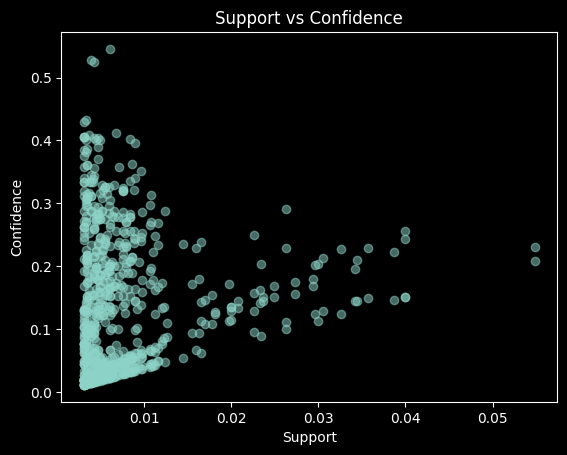

In [197]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
print("Support increasing causing confidence to fall")
plt.show()


Customer-Specific Analysis of Active customers-market basket analysis per customer group.

In [258]:
active_ids= df2[df2['Customer Segment']=='Active (0-3 months)']['Customer Name'].values
active_items_df = items_df[items_df['Customer Name'].isin(active_ids)].copy()

In [261]:
transactions = active_items_df['Items'].tolist()
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.002, use_colnames=True)

In [264]:
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.6,num_itemsets=len(frequent_itemsets))
rules[rules['lift']>2].sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Fasteners, Storage)",(Binders),0.006469,0.267280,0.004086,0.631579,2.362990,1.0,0.002357,1.988813,0.580563,0.015152,0.497187,0.323433
3,"(Labels, Tables)",(Paper),0.004767,0.244127,0.003064,0.642857,2.633293,1.0,0.001901,2.116445,0.623218,0.012465,0.527510,0.327705
13,"(Paper, Appliances, Storage)",(Binders),0.003745,0.267280,0.003064,0.818182,3.061146,1.0,0.002063,4.029963,0.675856,0.011436,0.751859,0.414823
8,"(Furnishings, Appliances, Chairs)",(Binders),0.003064,0.267280,0.002724,0.888889,3.325690,1.0,0.001905,6.594484,0.701460,0.010178,0.848358,0.449540
6,"(Furnishings, Appliances, Art)",(Binders),0.003064,0.267280,0.002724,0.888889,3.325690,1.0,0.001905,6.594484,0.701460,0.010178,0.848358,0.449540
10,"(Furnishings, Appliances, Storage)",(Binders),0.003745,0.267280,0.002724,0.727273,2.721019,1.0,0.001723,2.686642,0.634868,0.010152,0.627788,0.368732
7,"(Paper, Appliances, Art)",(Binders),0.003745,0.267280,0.002383,0.636364,2.380892,1.0,0.001382,2.014981,0.582170,0.008872,0.503717,0.322640
18,"(Phones, Storage, Chairs)",(Binders),0.003064,0.267280,0.002383,0.777778,2.909979,1.0,0.001564,3.297242,0.658372,0.008895,0.696716,0.393347
2,"(Fasteners, Supplies)",(Paper),0.003405,0.244127,0.002043,0.600000,2.457741,1.0,0.001212,1.889683,0.595149,0.008322,0.470811,0.304184
1,"(Chairs, Copiers)",(Paper),0.002043,0.244127,0.002043,1.000000,4.096234,1.0,0.001544,inf,0.757421,0.008368,1.000000,0.504184


In [86]:
frequent_itemsets = apriori(transaction_df, min_support=0.03, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
frequent_itemsets

,support,itemsets
19,0.063679,"(Paper, Binders)"
25,0.051887,"(Paper, Storage)"
17,0.044811,"(Paper, Art)"
21,0.044811,"(Storage, Binders)"
18,0.042453,"(Binders, Furnishings)"
24,0.037736,"(Paper, Phones)"
20,0.037736,"(Binders, Phones)"
16,0.037736,"(Binders, Art)"
23,0.035377,"(Paper, Furnishings)"
22,0.033019,"(Paper, Chairs)"


these are current popular itemsets

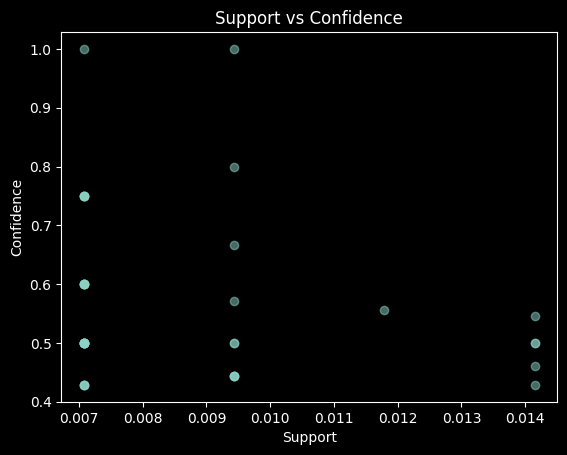

In [87]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


basket optimization and recommendation system

In [88]:
items_df['Count'].describe()

count    4905.000000
mean        1.997961
std         1.409735
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: Count, dtype: float64

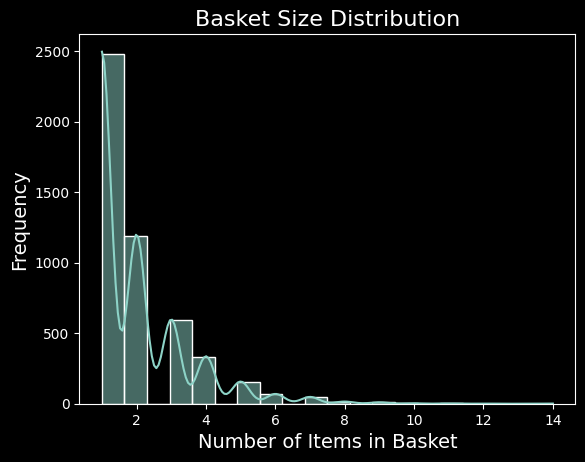

In [89]:
sns.histplot(items_df['Count'], bins=20, kde=True,)
plt.title("Basket Size Distribution", fontsize=16)
plt.xlabel("Number of Items in Basket", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

mostly small basket purchases are done, while there are few large baskets</br>
we can promote sales by giving offers if you buy 3-4 items together to increase basket size</br>
to increase large basket purchases, we can give special discounts to bulk buyers

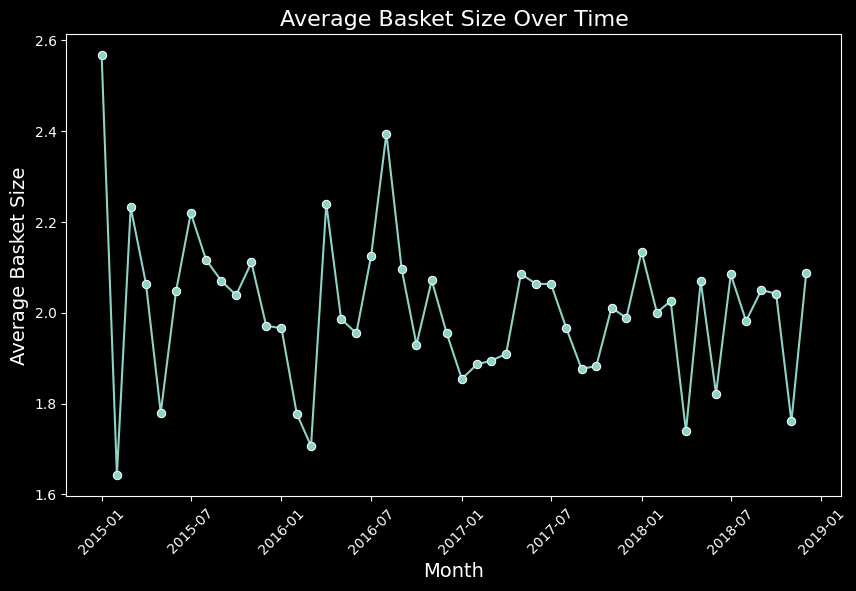

In [90]:
items_df['Month']=items_df['Order Date'].dt.to_period('M')
monthly_basket_size = items_df.groupby(items_df['Month'])['Count'].mean().reset_index()
monthly_basket_size['Month'] = monthly_basket_size['Month'].dt.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_basket_size, x='Month', y='Count', marker='o')
plt.title("Average Basket Size Over Time", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Basket Size", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [91]:
items_df.shape

(4905, 5)

# Recommendation System

In [92]:
transactions = items_df['Items'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transaction_df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets,num_itemsets=len(frequent_itemsets),metric='lift',min_threshold=1.5)
rules = rules.sort_values(by='confidence')
mba_rules = {}
for _,row in rules.iterrows():
    key = tuple(row['antecedents'])
    if key not in mba_rules:
        mba_rules[key]=[]
    mba_rules[key].append((row['consequents'], row['confidence'], row['lift']))


In [93]:
popular_catalogue = {}
for i in df['Sub-Category'].value_counts().index:
    popular_catalogue[i]=df[df['Sub-Category']==i].groupby('Product Name').size().nlargest(2).index.to_list()

In [94]:
list(popular_catalogue.values())[:4]

[['Avery Non-Stick Binders', 'Storex Dura Pro Binders'],
 ['Easy-staple paper', 'Xerox 1881'],
 ['Staple-based wall hangings', 'Eldon Wave Desk Accessories'],
 ['Geemarc AmpliPOWER60', 'AT&T 17929 Lendline Telephone']]

In [95]:
from itertools import chain, combinations
from sklearn.metrics.pairwise import cosine_similarity
cust_df = items_df.groupby('Customer Name')['Items'].sum().reset_index()
tras = cust_df['Items'].to_list()
te_ary = te.fit(tras).transform(tras)
tedf = pd.DataFrame(te_ary, columns=te.columns_, index=cust_df['Customer Name'])
similarity_matrix = cosine_similarity(tedf)
similarity_df = pd.DataFrame(similarity_matrix, index=cust_df['Customer Name'], columns=cust_df['Customer Name'])

In [ ]:
def recommend_cf(target_user, similarity_df, df, top_n=6):
    similar_users = similarity_df[target_user].drop(target_user)
    recommendations = {}
    for similar_user in similar_users.index:
        similarity_score = similar_users.loc[similar_user]
        for item in df.columns:
            if df.loc[target_user, item] == False and df.loc[similar_user, item] == True:
                recommendations[item] = recommendations.get(item, 0) + similarity_score
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return {item[0]: float(item[1]) for item in sorted_recommendations[:top_n]}
def all_non_empty_subsets(s):
    return [tuple(subset) for subset in chain.from_iterable(combinations(s, r) for r in range(1, len(s) + 1))]
def recommend(name, rules, cart=None, category=None,similarity_df=None,tedf=None):
    if cart is None and category is None and name in tedf.index:
        recom = recommend_cf(name, similarity_df, tedf)
        rec = [popular_catalogue.get(i[0], [i[0]]) for i in recom][:4]
        return [item for sublist in rec for item in sublist]
    if cart is None and category is not None:
        return popular_catalogue.get(category, [])
    if cart is not None:
        if(name in tedf.index):
            alpha = 0.7 if len(tedf.loc[name]) > 5 else 0.3 
        else:
            alpha=0
        beta = 1 - alpha
        cart = set(cart)
        recommendations = {}
        mba={}
        cf_n={}
        for itemsets in all_non_empty_subsets(cart):
            for r, c, l in rules.get(itemsets, []):  
                filtered_r = set(r) - cart 
                for item in filtered_r:
                    mba[item] = mba.get(item, 0) + (c * l)
        if(name in tedf.index):
            cf = recommend_cf(name,similarity_df,tedf)
            cf_max = max(cf.values(),default=1)
            cf_n = {item[0]:item[1]/cf_max for item in cf.items()}
        mba_max = max(mba.values(),default=1)  
        mba_n = {item[0]:item[1]/mba_max for item in mba.items()}
        for item in set(cf_n.keys()).union(set(mba_n.keys())):
            recommendations[item] = alpha * cf_n.get(item, 0) + beta * mba_n.get(item, 0)
        sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
        rec = [popular_catalogue.get(i[0], [i[0]]) for i in sorted_recommendations][:4]
        return [item for sublist in rec for item in sublist]
    return [item for sublist in list(popular_catalogue.values())[:4] for item in sublist[:1]]
recommend("Micky",rules=mba_rules,similarity_df=similarity_df,tedf=tedf)

['Avery Non-Stick Binders',
 'Easy-staple paper',
 'Staple-based wall hangings',
 'Geemarc AmpliPOWER60']